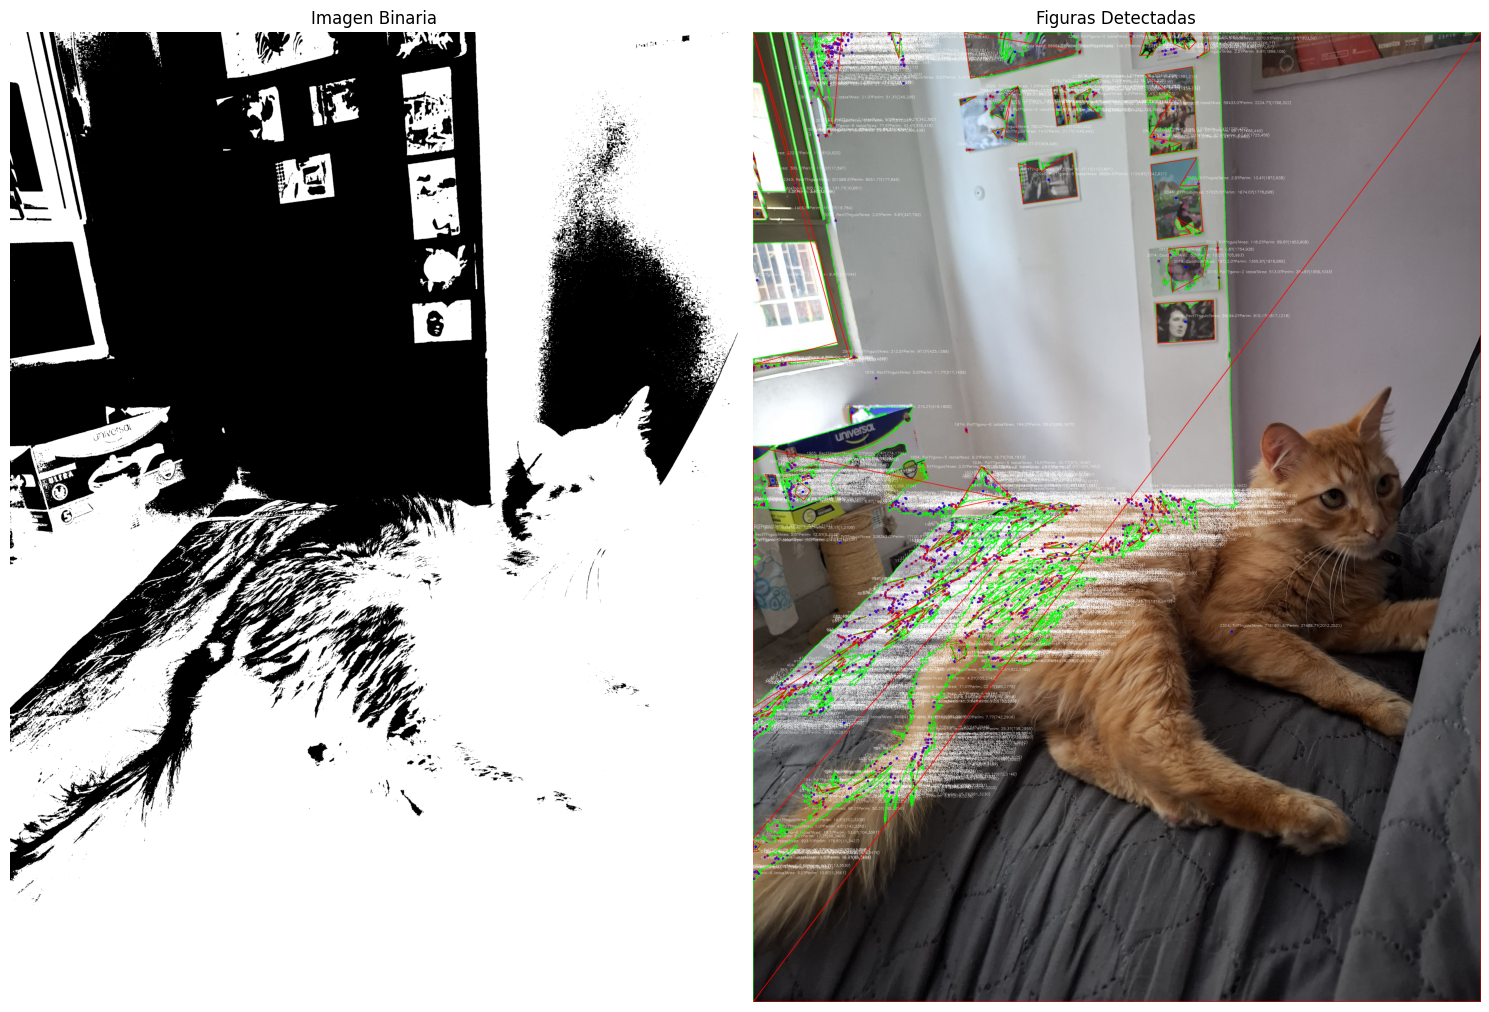


RESUMEN DE FIGURAS DETECTADAS:
Número total de figuras: 2343
Figura 1: Polígono-6 lados - Área: 5.0 - Perímetro: 10.8
Figura 2: Polígono-2 lados - Área: 0.0 - Perímetro: 2.0
Figura 3: Polígono-2 lados - Área: 0.0 - Perímetro: 2.0
Figura 4: Triángulo - Área: 1.0 - Perímetro: 4.8
Figura 5: Polígono-2 lados - Área: 0.0 - Perímetro: 2.0
Figura 6: Cuadrado - Área: 1.0 - Perímetro: 4.0
Figura 7: Triángulo - Área: 0.5 - Perímetro: 3.4
Figura 8: Polígono-5 lados - Área: 8.0 - Perímetro: 13.7
Figura 9: Polígono-2 lados - Área: 0.0 - Perímetro: 2.0
Figura 10: Polígono-5 lados - Área: 15.0 - Perímetro: 16.5
Figura 11: Polígono-1 lados - Área: 0.0 - Perímetro: 0.0
Figura 12: Polígono-7 lados - Área: 1.5 - Perímetro: 10.2
Figura 13: Polígono-2 lados - Área: 0.0 - Perímetro: 2.0
Figura 14: Polígono-1 lados - Área: 0.0 - Perímetro: 0.0
Figura 15: Polígono-1 lados - Área: 0.0 - Perímetro: 0.0
Figura 16: Triángulo - Área: 2.0 - Perímetro: 6.8
Figura 17: Polígono-6 lados - Área: 0.5 - Perímetro: 8.2
Fi

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow  # Solo para Colab

def classify_shape(contour):
    """Clasifica una figura según su número de lados"""
    perimeter = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.04 * perimeter, True)
    num_sides = len(approx)

    if num_sides == 3:
        return "Triángulo", approx
    elif num_sides == 4:
        # Verificar si es cuadrado o rectángulo
        x, y, w, h = cv2.boundingRect(contour)
        aspect_ratio = float(w)/h
        if 0.95 <= aspect_ratio <= 1.05:
            return "Cuadrado", approx
        else:
            return "Rectángulo", approx
    elif num_sides >= 8:
        return "Círculo", approx
    else:
        return f"Polígono-{num_sides} lados", approx

# 1. Cargar y binarizar la imagen
img_path = '/content/MichiJuanP4.jpg'  # Reemplaza con tu imagen
img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

# 2. Detectar contornos
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 3. Crear imagen para dibujar resultados
result_img = img.copy()

# 4. Procesar cada contorno
for i, contour in enumerate(contours):
    # Calcular propiedades
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    M = cv2.moments(contour)

    # Calcular centroide
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        cX, cY = 0, 0

    # Clasificar figura (Bonus)
    shape, approx = classify_shape(contour)

    # Dibujar contorno y centroide
    cv2.drawContours(result_img, [contour], -1, (0, 255, 0), 2)
    cv2.circle(result_img, (cX, cY), 5, (255, 0, 0), -1)

    # Dibujar aproximación de polígono
    cv2.drawContours(result_img, [approx], -1, (0, 0, 255), 2)

    # Mostrar información
    info = f"{i+1}: {shape}\nArea: {area:.1f}\nPerim: {perimeter:.1f}\n({cX},{cY})"
    cv2.putText(result_img, info, (cX - 50, cY - 20),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

# Mostrar resultados
plt.figure(figsize=(15, 10))

# Imagen binaria
plt.subplot(1, 2, 1)
plt.imshow(binary, cmap='gray')
plt.title('Imagen Binaria')
plt.axis('off')

# Resultados
plt.subplot(1, 2, 2)
result_rgb = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)
plt.imshow(result_rgb)
plt.title('Figuras Detectadas')
plt.axis('off')

plt.tight_layout()
plt.show()

# Mostrar métricas generales
print("\nRESUMEN DE FIGURAS DETECTADAS:")
print(f"Número total de figuras: {len(contours)}")
for i, contour in enumerate(contours):
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    shape, _ = classify_shape(contour)
    print(f"Figura {i+1}: {shape} - Área: {area:.1f} - Perímetro: {perimeter:.1f}")